# In this example we use the MdB class to access a database of models. 

The dabase is 3MdB, described here: https://sites.google.com/site/mexicanmillionmodels/the-different-projects/hii_chim

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
pc.config.db_connector = 'PyMySQL'

In [2]:
# Defining the connection parameters.
OVN_dic = {'host' : '132.248.1.102',
           'user_name' : 'OVN_user',
           'user_passwd' : 'oiii5007', 
           'base_name' : '3MdB',
           'master_table' : '`tab`',
           'teion_table' : '`teion`',
           'abion_table' : '`abion`',
           'temis_table' : '`temis`',
           }
# Initialisation of the connection
MdB = pc.MdB(OVN_dic)
# Define verbosity level for the database interactions.
MdB.log_.level = 3

In [3]:
# Query the database
res, N = MdB.select_dB(select_='12+oxygen AS OH, nitrogen-oxygen AS NO, lumi AS logU, (O_II__3726A + O_II__3729A)/H__1__4861A AS O2, '+\
                       'TOTL__4363A/H__1__4861A AS O3_4363, O__3__5007A/H__1__4861A AS O3, N__2__6584A/H__1__6563A AS N2, '+\
                       '(S_II__6716A + S_II__6731A)/H__1__4861A AS S2',
                       from_='tab', where_ = 'ref = "HII_CHIm" and com1 = "O"',
                       limit_=None, format_ = 'dict2')

     MdB: Command sent: SELECT 12+oxygen AS OH, nitrogen-oxygen AS NO, lumi AS logU, (O_II__3726A + O_II__3729A)/H__1__4861A AS O2, TOTL__4363A/H__1__4861A AS O3_4363, O__3__5007A/H__1__4861A AS O3, N__2__6584A/H__1__6563A AS N2, (S_II__6716A + S_II__6731A)/H__1__4861A AS S2 FROM tab WHERE (ref = "HII_CHIm" and com1 = "O") 


In [4]:
print(N)

3927


In [5]:
res

{'N2': array([ 0.37295509,  0.05138996,  0.29793465, ...,  1.63904092,
         0.0062069 ,  0.07379963]),
 'NO': array([-0.625,  0.   , -0.25 , ..., -0.25 , -1.375, -0.375]),
 'O2': array([ 1.2829238 ,  0.13497929,  0.09475677, ...,  2.95234128,
         0.34367245,  0.39257675]),
 'O3': array([  4.10770298e-01,   2.58143588e+00,   2.14617020e-03, ...,
          1.79309198e-01,   7.55959305e+00,   8.20131176e+00]),
 'O3_4363': array([  2.68486756e-04,   7.84195649e-02,   1.14699499e-07, ...,
          5.86599510e-04,   1.64803649e-01,   1.55581694e-01]),
 'OH': array([ 8.9,  7.3,  9.1, ...,  8.4,  7.9,  8. ]),
 'S2': array([ 0.45685526,  0.02079208,  0.27993109, ...,  1.41845881,
         0.05864829,  0.06925091]),
 'logU': array([-2.75, -1.75, -3.25, ..., -3.75, -1.5 , -1.5 ])}

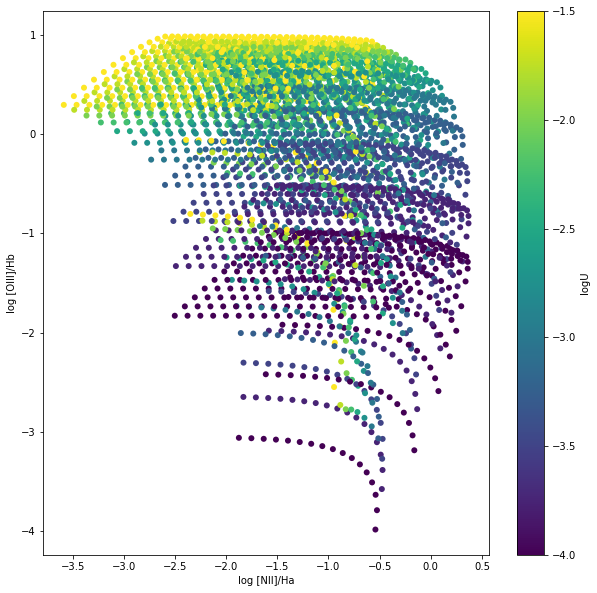

In [6]:
plt.figure(figsize=(10, 10))
plt.scatter(np.log10(res['N2']), np.log10(res['O3']), c=res['logU'], edgecolor = 'none')
plt.xlabel('log [NII]/Ha')
plt.ylabel('log [OIII]/Hb')
cb = plt.colorbar()
cb.set_label('logU')

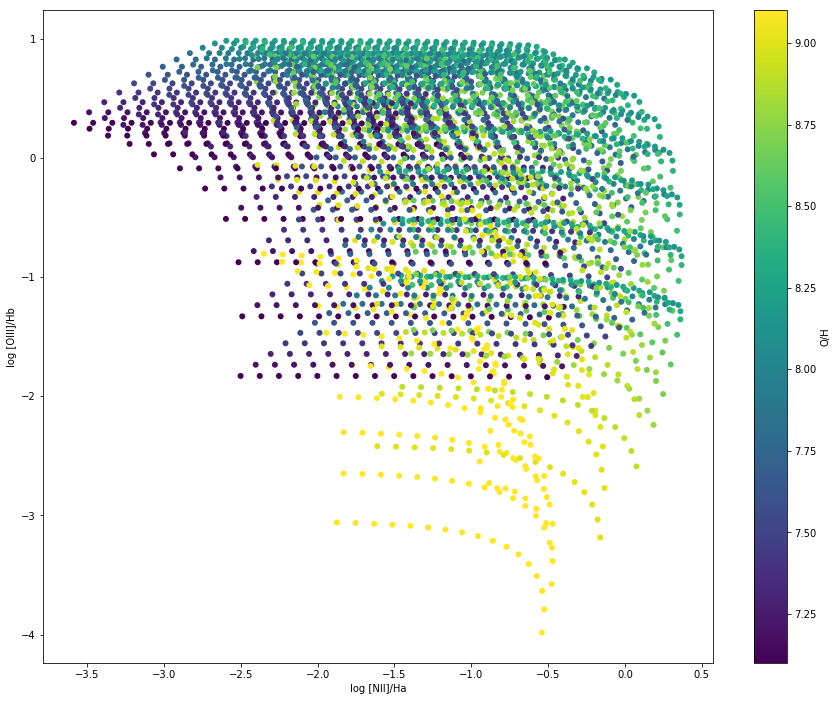

In [7]:
plt.figure(figsize=(15, 12))
plt.scatter(np.log10(res['N2']), np.log10(res['O3']), c=res['OH'], edgecolor = 'none')
plt.xlabel('log [NII]/Ha')
plt.ylabel('log [OIII]/Hb')
cb = plt.colorbar()
cb.set_label('O/H')

In [8]:
N = MdB.count_dB(from_=OVN_dic['master_table'], where_="ref like 'PNe_2014'")
print("Total number of models with ref='PNe_2014': {}".format(N))

     MdB: Command sent: SELECT count(*) FROM `tab` WHERE (ref like 'PNe_2014')
Total number of models with ref='PNe_2014': 542950


In [9]:
# Query the database
com1 = 'B' # Blackbody
com2 = 'C' # Constant density
com4 = 'S' # Solar metallicity
com5 = 'N' # No dust
com6 = 1 # selected models
res, N = MdB.select_dB(select_='A_HYDROGEN_vol_1, A_HELIUM_vol_1, A_HELIUM_vol_2, A_CARBON_vol_2, A_NITROGEN_vol_1, A_OXYGEN_vol_1,A_OXYGEN_vol_2, '+\
                       'A_NEON_vol_2, A_NEON_vol_4, A_SULPHUR_vol_1, A_SULPHUR_vol_2, A_CHLORINE_vol_1, A_CHLORINE_vol_2, A_CHLORINE_vol_3, '+\
                       'A_ARGON_vol_2, A_ZINC_vol_3, A_IRON_vol_2, A_NICKEL_vol_2, MassFrac, atm1 ',
                       from_="{0}, {1}".format(OVN_dic['master_table'], OVN_dic['abion_table']), 
                       where_ = "{0}.ref like 'PNe_2014' and {0}.N = {1}.N and com1 like '{2}%' and com2 like '{3}%' and com4 = '{4}' and com5 = '{5}' and com6 = {6}".format(OVN_dic['master_table'], OVN_dic['abion_table'], com1, com2, com4, com5, com6), 
                       limit_=None, format_ = 'dict2')

     MdB: Command sent: SELECT A_HYDROGEN_vol_1, A_HELIUM_vol_1, A_HELIUM_vol_2, A_CARBON_vol_2, A_NITROGEN_vol_1, A_OXYGEN_vol_1,A_OXYGEN_vol_2, A_NEON_vol_2, A_NEON_vol_4, A_SULPHUR_vol_1, A_SULPHUR_vol_2, A_CHLORINE_vol_1, A_CHLORINE_vol_2, A_CHLORINE_vol_3, A_ARGON_vol_2, A_ZINC_vol_3, A_IRON_vol_2, A_NICKEL_vol_2, MassFrac, atm1  FROM `tab`, `abion` WHERE (`tab`.ref like 'PNe_2014' and `tab`.N = `abion`.N and com1 like 'B%' and com2 like 'C%' and com4 = 'S' and com5 = 'N' and com6 = 1) 


In [10]:
print(N)

3021


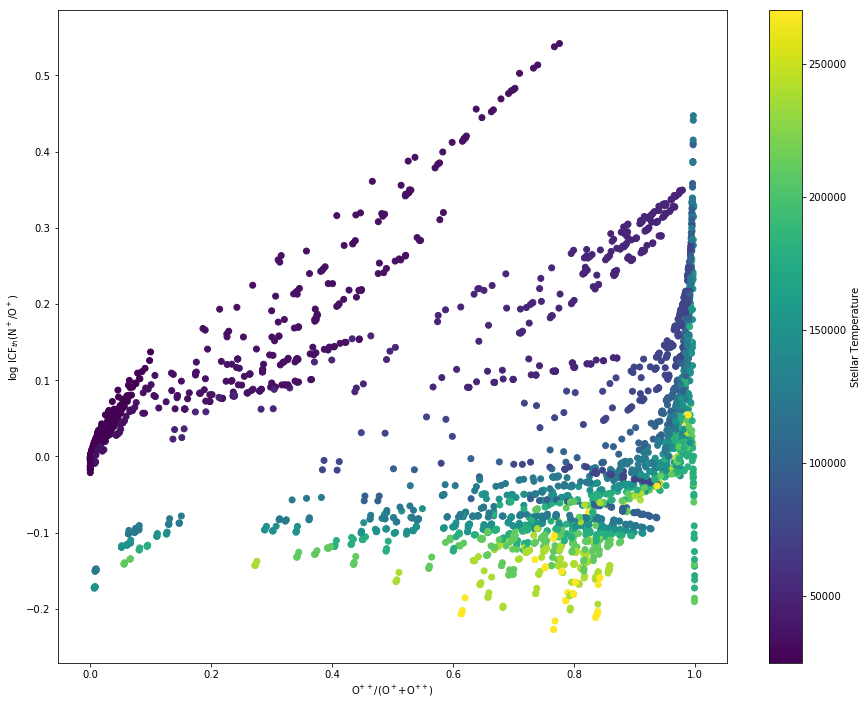

In [11]:
plt.figure(figsize=(15, 12))
plt.scatter(res['A_OXYGEN_vol_2']/(res['A_OXYGEN_vol_1']+res['A_OXYGEN_vol_2']), 
                np.log10(res['A_OXYGEN_vol_1']/res['A_NITROGEN_vol_1']), c=res['atm1'])
plt.xlabel(r'O$^{++}$/(O$^+$+O$^{++}$)')
plt.ylabel(r'log ICF$_{th}$(N$^+$/O$^+$)')
cb = plt.colorbar()
cb.set_label('Stellar Temperature')